<a href="https://colab.research.google.com/github/deepsharma26/SIRT1_ML_NPASS/blob/main/Part5_Stage2_top10_algorithms_wihtout_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. LabelSpreading

Model: LabelSpreading (No Sampling)
Accuracy: 0.8368055555555556
Balanced Accuracy: 0.7055266178158383
F1 Score: 0.5052631578947369
Cohen's Kappa: 0.40756302521008403
Mean Absolute Error: 0.16319444444444445

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       241
           1       0.50      0.51      0.51        47

    accuracy                           0.84       288
   macro avg       0.70      0.71      0.70       288
weighted avg       0.84      0.84      0.84       288



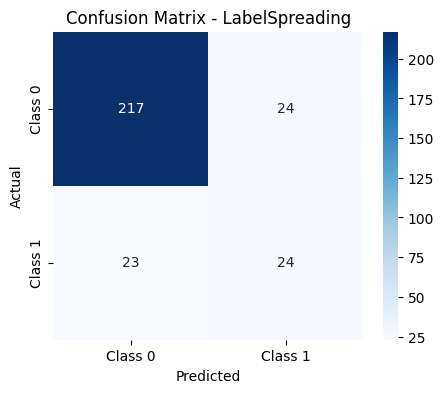

In [ ]:
!pip install matplotlib seaborn scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    classification_report, confusion_matrix, cohen_kappa_score,
    mean_absolute_error
)
# ---------------------- CHANGED IMPORT ----------------------
from sklearn.semi_supervised import LabelSpreading
# ------------------------------------------------------------
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv("/content/Final_Trainset_Top20.csv")


X = df.drop(columns=["BioactivityClass"])
y = df["BioactivityClass"]


if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ---------------------- CHANGED MODEL ----------------------
model = LabelSpreading(kernel='rbf', gamma=20)
# ----------------------------------------------------------

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Model: LabelSpreading (No Sampling)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Cohen's Kappa:", cohen_kappa_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LabelSpreading')
plt.savefig("Confusion_matrix_LabelSpreading_without_sampling.jpg", dpi=300, bbox_inches='tight')
plt.show()


#2. LabelPropagation

Model: LabelPropagation (No Sampling)
Accuracy: 0.8368055555555556
Balanced Accuracy: 0.7055266178158383
ROC AUC: 0.8604661428445307
F1 Score: 0.5052631578947369
Cohen's Kappa: 0.40756302521008403
Mean Absolute Error: 0.16319444444444445

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       241
           1       0.50      0.51      0.51        47

    accuracy                           0.84       288
   macro avg       0.70      0.71      0.70       288
weighted avg       0.84      0.84      0.84       288



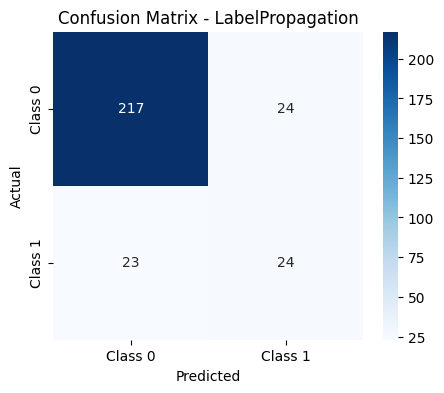

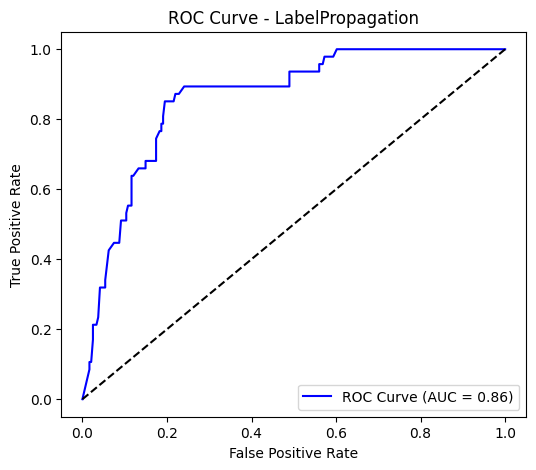

In [ ]:
!pip install matplotlib seaborn scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, roc_auc_score, f1_score,
    classification_report, confusion_matrix, cohen_kappa_score, mean_absolute_error,
    roc_curve
)
# ---------------------- CHANGED IMPORT ----------------------
from sklearn.semi_supervised import LabelPropagation
# -----------------------------------------------------------
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv("/content/Final_Trainset_Top20.csv")


X = df.drop(columns=["BioactivityClass"])
y = df["BioactivityClass"]


if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


# ---------------------- CHANGED MODEL ----------------------
# LabelPropagation (semi-supervised). max_iter increased for convergence.
model = LabelPropagation(max_iter=1000)
# -----------------------------------------------------------

model.fit(X_train, y_train)


y_pred = model.predict(X_test)
# LabelPropagation supports predict_proba
y_prob = model.predict_proba(X_test)[:, 1]


print("Model: LabelPropagation (No Sampling)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("F1 Score:", f1_score(y_test, y_pred))
print("Cohen's Kappa:", cohen_kappa_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LabelPropagation')
plt.savefig("Confusion_matrix_LabelPropagation_without_sampling.jpg", dpi=300, bbox_inches = 'tight')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LabelPropagation')
plt.legend(loc='lower right')
plt.savefig("ROC_LabelPropagation_without_sampling.jpg", dpi=300, bbox_inches = 'tight')
plt.show()


#3. RandomForestClassifier

Model: RandomForestClassifier (No Sampling)
Accuracy: 0.8472222222222222
Balanced Accuracy: 0.7031870751302198
ROC AUC: 0.8649686589564757
F1 Score: 0.5111111111111111
Cohen's Kappa: 0.4207880062162903
Mean Absolute Error: 0.1527777777777778

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       241
           1       0.53      0.49      0.51        47

    accuracy                           0.85       288
   macro avg       0.72      0.70      0.71       288
weighted avg       0.84      0.85      0.84       288



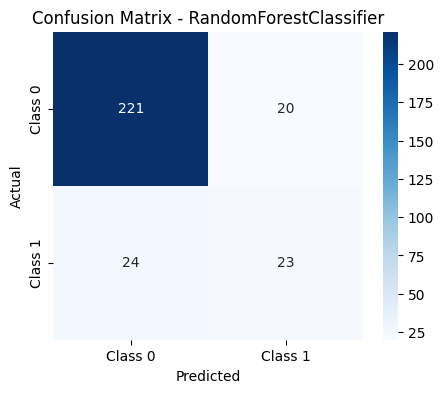

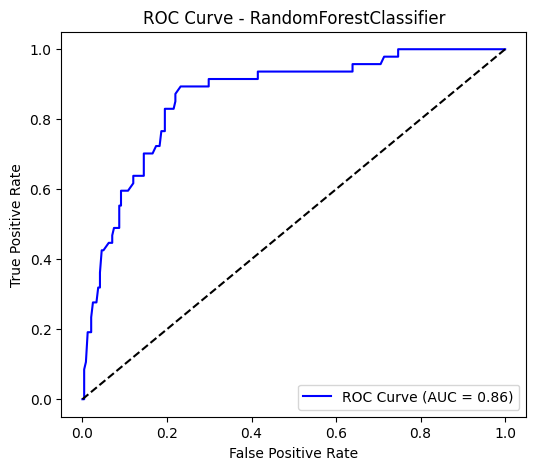

In [ ]:
!pip install matplotlib seaborn scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, roc_auc_score, f1_score,
    classification_report, confusion_matrix, cohen_kappa_score, mean_absolute_error,
    roc_curve
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv("/content/Final_Trainset_Top20.csv")


X = df.drop(columns=["BioactivityClass"])
y = df["BioactivityClass"]


if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


print("Model: RandomForestClassifier (No Sampling)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("F1 Score:", f1_score(y_test, y_pred))
print("Cohen's Kappa:", cohen_kappa_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - RandomForestClassifier')
plt.savefig("Confusion_matrix_RandomForestClassifier_without_sampling.jpg", dpi=300, bbox_inches = 'tight')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - RandomForestClassifier')
plt.legend(loc='lower right')
plt.savefig("ROC_RandomForestClassifier_without_sampling.jpg", dpi=300, bbox_inches = 'tight')
plt.show()


#4. LGBMClassifier

[LightGBM] [Info] Number of positive: 108, number of negative: 562
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 40
[LightGBM] [Info] Number of data points in the train set: 670, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161194 -> initscore=-1.649371
[LightGBM] [Info] Start training from score -1.649371
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


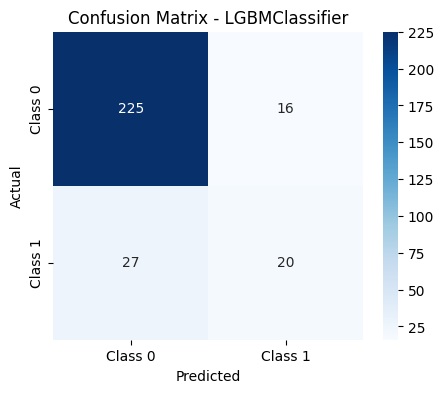

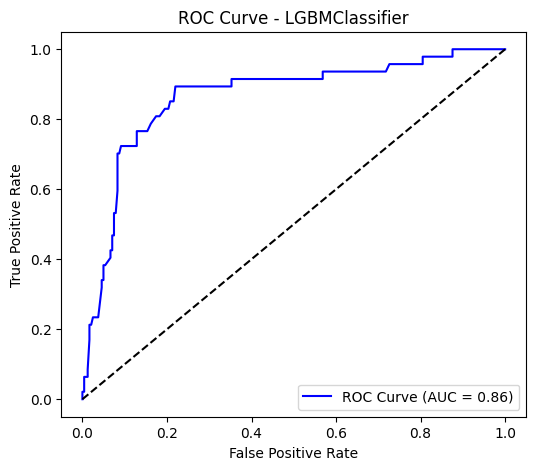

In [ ]:
!pip install matplotlib seaborn scikit-learn lightgbm --quiet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, roc_auc_score, f1_score,
    classification_report, confusion_matrix, cohen_kappa_score, mean_absolute_error,
    roc_curve
)
# ---------------------- CHANGED IMPORT ----------------------
from lightgbm import LGBMClassifier
# -----------------------------------------------------------
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv("/content/Final_Trainset_Top20.csv")


X = df.drop(columns=["BioactivityClass"])
y = df["BioactivityClass"]


if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


# ---------------------- CHANGED MODEL ----------------------
model = LGBMClassifier(n_estimators=100, random_state=42, n_jobs=-1)
# -----------------------------------------------------------

model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


print("Model: LGBMClassifier (No Sampling)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("F1 Score:", f1_score(y_test, y_pred))
print("Cohen's Kappa:", cohen_kappa_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LGBMClassifier')
plt.savefig("Confusion_matrix_LGBMClassifier_without_sampling.jpg", dpi=300, bbox_inches = 'tight')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LGBMClassifier')
plt.legend(loc='lower right')
plt.savefig("ROC_LGBMClassifier_without_sampling.jpg", dpi=300, bbox_inches = 'tight')
plt.show()


#5. BaggingClassifier

Model: BaggingClassifier (No Sampling)
Accuracy: 0.8506944444444444
Balanced Accuracy: 0.7223889820782201
ROC AUC: 0.863953385715547
F1 Score: 0.5376344086021505
Cohen's Kappa: 0.448619768477293
Mean Absolute Error: 0.14930555555555555

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       241
           1       0.54      0.53      0.54        47

    accuracy                           0.85       288
   macro avg       0.73      0.72      0.72       288
weighted avg       0.85      0.85      0.85       288



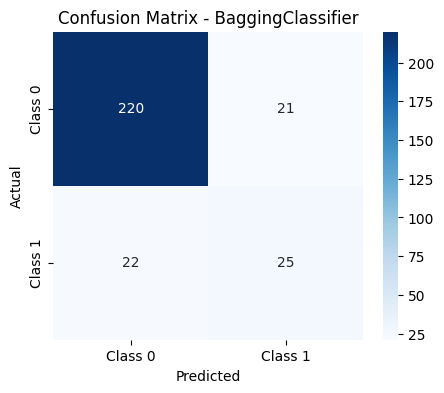

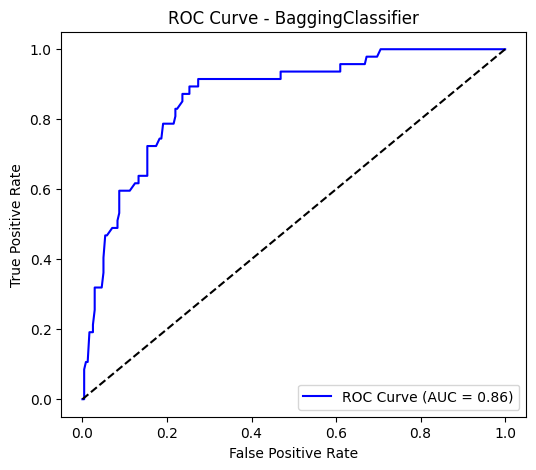

In [ ]:
!pip install matplotlib seaborn scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, roc_auc_score, f1_score,
    classification_report, confusion_matrix, cohen_kappa_score, mean_absolute_error,
    roc_curve
)
# ---------------------- CHANGED IMPORT ----------------------
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# -----------------------------------------------------------
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv("/content/Final_Trainset_Top20.csv")


X = df.drop(columns=["BioactivityClass"])
y = df["BioactivityClass"]


if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


# ---------------------- CHANGED MODEL ----------------------
# Bagging of Decision Trees (100 base estimators), reproducible
model = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
# -----------------------------------------------------------

model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


print("Model: BaggingClassifier (No Sampling)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("F1 Score:", f1_score(y_test, y_pred))
print("Cohen's Kappa:", cohen_kappa_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - BaggingClassifier')
plt.savefig("Confusion_matrix_BaggingClassifier_without_sampling.jpg", dpi=300, bbox_inches = 'tight')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - BaggingClassifier')
plt.legend(loc='lower right')
plt.savefig("ROC_BaggingClassifier_without_sampling.jpg", dpi=300, bbox_inches = 'tight')
plt.show()


#6. BernoulliNB

Model: BernoulliNB (No Sampling)
Accuracy: 0.7638888888888888
Balanced Accuracy: 0.7304670256908272
ROC AUC: 0.7794208528295223
F1 Score: 0.48484848484848486
Cohen's Kappa: 0.3477652700992474
Mean Absolute Error: 0.2361111111111111

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.78      0.85       241
           1       0.38      0.68      0.48        47

    accuracy                           0.76       288
   macro avg       0.65      0.73      0.67       288
weighted avg       0.84      0.76      0.79       288



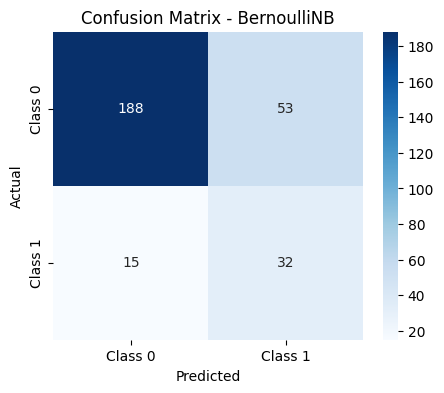

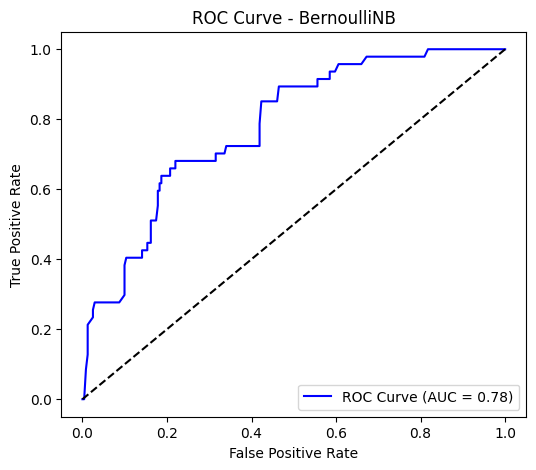

In [ ]:
!pip install matplotlib seaborn scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, roc_auc_score, f1_score,
    classification_report, confusion_matrix, cohen_kappa_score, mean_absolute_error,
    roc_curve
)
# ---------------------- CHANGED IMPORT ----------------------
from sklearn.naive_bayes import BernoulliNB
# ------------------------------------------------------------
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv("/content/Final_Trainset_Top20.csv")


X = df.drop(columns=["BioactivityClass"])
y = df["BioactivityClass"]


if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


# ---------------------- CHANGED MODEL ----------------------
model = BernoulliNB()
model.fit(X_train, y_train)
# -----------------------------------------------------------


y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


print("Model: BernoulliNB (No Sampling)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("F1 Score:", f1_score(y_test, y_pred))
print("Cohen's Kappa:", cohen_kappa_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - BernoulliNB')
plt.savefig("Confusion_matrix_BernoulliNB_without_sampling.jpg", dpi=300, bbox_inches='tight')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - BernoulliNB')
plt.legend(loc='lower right')
plt.savefig("ROC_BernoulliNB_without_sampling.jpg", dpi=300, bbox_inches='tight')
plt.show()


#7. QuadraticDiscriminantAnalysis (QDA)

Model: Quadratic Discriminant Analysis (No Sampling)
Accuracy: 0.8159722222222222
Balanced Accuracy: 0.7530237485653748
ROC AUC: 0.8414849474706454
F1 Score: 0.5391304347826087
Cohen's Kappa: 0.4289134989524095
Mean Absolute Error: 0.1840277777777778

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89       241
           1       0.46      0.66      0.54        47

    accuracy                           0.82       288
   macro avg       0.69      0.75      0.71       288
weighted avg       0.85      0.82      0.83       288



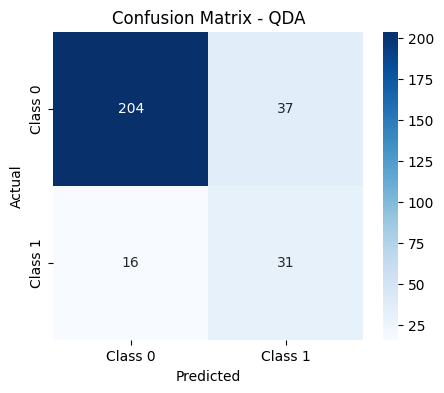

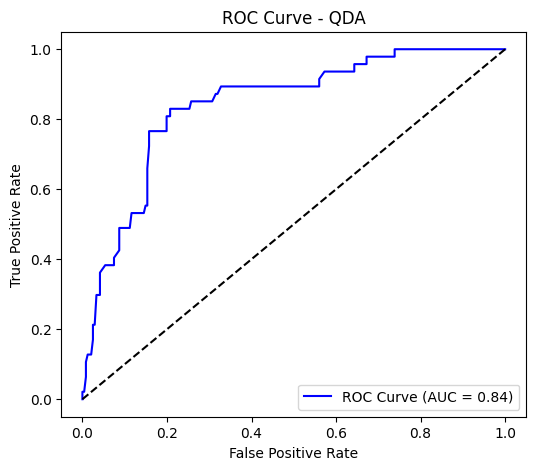

In [ ]:
!pip install matplotlib seaborn scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, roc_auc_score, f1_score,
    classification_report, confusion_matrix, cohen_kappa_score, mean_absolute_error,
    roc_curve
)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv("/content/Final_Trainset_Top20.csv")


X = df.drop(columns=["BioactivityClass"])
y = df["BioactivityClass"]


if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


print("Model: Quadratic Discriminant Analysis (No Sampling)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("F1 Score:", f1_score(y_test, y_pred))
print("Cohen's Kappa:", cohen_kappa_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - QDA')
plt.savefig("Confusion_matrix_QDA_without_sampling.jpg", dpi=300, bbox_inches = 'tight')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - QDA')
plt.legend(loc='lower right')
plt.savefig("ROC_QDA_without_sampling.jpg", dpi=300, bbox_inches = 'tight')
plt.show()


#8. DecisionTreeClassifier

Model: DecisionTreeClassifier (No Sampling)
Accuracy: 0.8368055555555556
Balanced Accuracy: 0.6969630087401784
ROC AUC: 0.7926635472764192
F1 Score: 0.4946236559139785
Cohen's Kappa: 0.39732858414959926
Mean Absolute Error: 0.16319444444444445

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       241
           1       0.50      0.49      0.49        47

    accuracy                           0.84       288
   macro avg       0.70      0.70      0.70       288
weighted avg       0.84      0.84      0.84       288



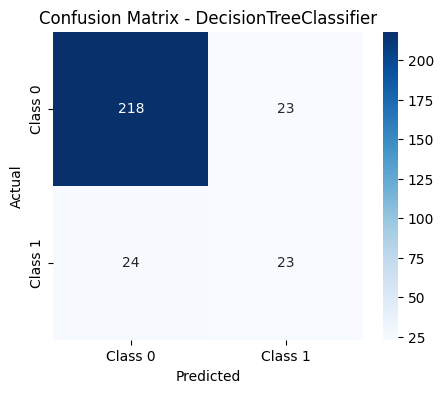

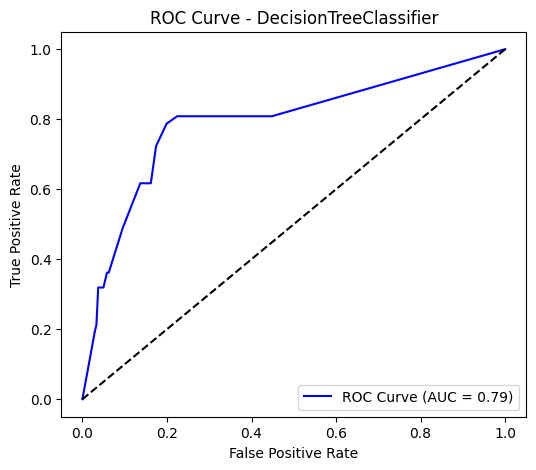

In [ ]:
!pip install matplotlib seaborn scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, roc_auc_score, f1_score,
    classification_report, confusion_matrix, cohen_kappa_score, mean_absolute_error,
    roc_curve
)
# ---------------------- CHANGED IMPORT ----------------------
from sklearn.tree import DecisionTreeClassifier
# ------------------------------------------------------------
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv("/content/Final_Trainset_Top20.csv")


X = df.drop(columns=["BioactivityClass"])
y = df["BioactivityClass"]


if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


# ---------------------- CHANGED MODEL ----------------------
model = DecisionTreeClassifier(random_state=42)
# -----------------------------------------------------------
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


print("Model: DecisionTreeClassifier (No Sampling)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("F1 Score:", f1_score(y_test, y_pred))
print("Cohen's Kappa:", cohen_kappa_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - DecisionTreeClassifier')
plt.savefig("Confusion_matrix_DecisionTreeClassifier_without_sampling.jpg", dpi=300, bbox_inches='tight')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - DecisionTreeClassifier')
plt.legend(loc='lower right')
plt.savefig("ROC_DecisionTreeClassifier_without_sampling.jpg", dpi=300, bbox_inches='tight')
plt.show()


#9. ExtraTreesClassifier

Model: ExtraTreesClassifier (No Sampling)
Accuracy: 0.8506944444444444
Balanced Accuracy: 0.7052617639269003
ROC AUC: 0.8396751125629027
F1 Score: 0.5168539325842697
Cohen's Kappa: 0.4288876591034865
Mean Absolute Error: 0.14930555555555555

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       241
           1       0.55      0.49      0.52        47

    accuracy                           0.85       288
   macro avg       0.73      0.71      0.71       288
weighted avg       0.84      0.85      0.85       288



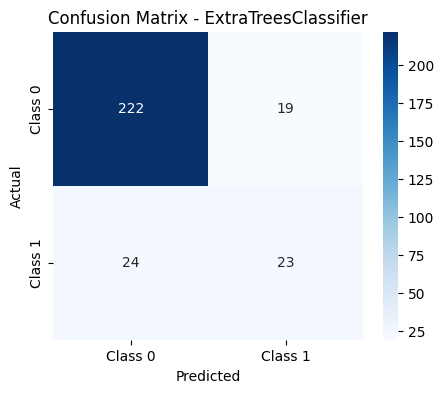

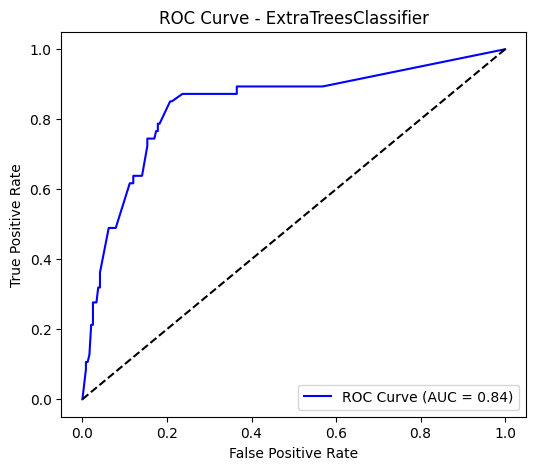

In [ ]:
!pip install matplotlib seaborn scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, roc_auc_score, f1_score,
    classification_report, confusion_matrix, cohen_kappa_score, mean_absolute_error,
    roc_curve
)
# ---------------------- CHANGED IMPORT ----------------------
from sklearn.ensemble import ExtraTreesClassifier
# ------------------------------------------------------------
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv("/content/Final_Trainset_Top20.csv")


X = df.drop(columns=["BioactivityClass"])
y = df["BioactivityClass"]


if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


# ---------------------- CHANGED MODEL ----------------------
model = ExtraTreesClassifier(n_estimators=100, random_state=42, n_jobs=-1)
# -----------------------------------------------------------
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


print("Model: ExtraTreesClassifier (No Sampling)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("F1 Score:", f1_score(y_test, y_pred))
print("Cohen's Kappa:", cohen_kappa_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - ExtraTreesClassifier')
plt.savefig("Confusion_matrix_ExtraTreesClassifier_without_sampling.jpg", dpi=300, bbox_inches='tight')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - ExtraTreesClassifier')
plt.legend(loc='lower right')
plt.savefig("ROC_ExtraTreesClassifier_without_sampling.jpg", dpi=300, bbox_inches='tight')
plt.show()


#10. XGBClassifier (XGB)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:35:50] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model: XGBClassifier
Accuracy: 0.84375
Balanced Accuracy: 0.728096301811864
ROC AUC: 0.8248531480102589
F1 Score: 0.5544554455445545
Cohen's Kappa: 0.45972986493246626
Mean Absolute Error: 0.15625

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91       237
           1       0.56      0.55      0.55        51

    accuracy                           0.84       288
   macro avg       0.73      0.73      0.73       288
weighted avg       0.84      0.84      0.84       288



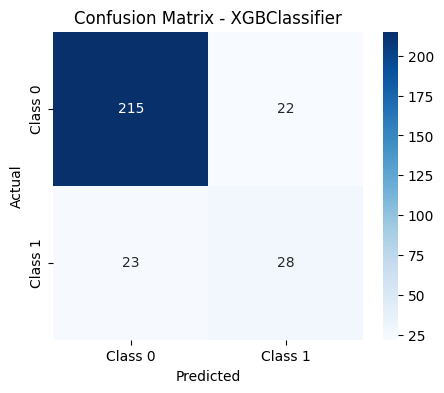

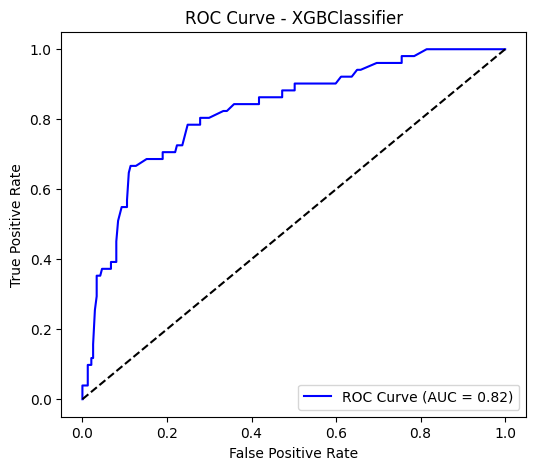

In [ ]:
!pip install xgboost matplotlib seaborn scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, roc_auc_score, f1_score,
    classification_report, confusion_matrix, cohen_kappa_score, mean_absolute_error,
    roc_curve
)
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("/content/Final_Trainset_Top20.csv")  # change path if needed

# Features and target
X = df.drop(columns=["BioactivityClass"])
y = df["BioactivityClass"]

# Encode target if categorical
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Metrics
print("Model: XGBClassifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("F1 Score:", f1_score(y_test, y_pred))
print("Cohen's Kappa:", cohen_kappa_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBClassifier')
plt.savefig("Confusion_matrix_XGB_without_sampling.jpg", dpi=300, bbox_inches = 'tight')
plt.show()

# ROC Curve Plot
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # random chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBClassifier')
plt.legend(loc='lower right')
plt.savefig("ROC_XGB_without_sampling.jpg", dpi=300, bbox_inches = 'tight')
plt.show()


In [ ]:
! zip SIRT1_without_sampling.zip *.csv *.jpg

  adding: Final_Trainset_Top20.csv (deflated 94%)
  adding: Confusion_matrix_BaggingClassifier_without_sampling.jpg (deflated 39%)
  adding: Confusion_matrix_BernoulliNB_without_sampling.jpg (deflated 40%)
  adding: Confusion_matrix_DecisionTreeClassifier_without_sampling.jpg (deflated 37%)
  adding: Confusion_matrix_ExtraTreesClassifier_without_sampling.jpg (deflated 38%)
  adding: Confusion_matrix_LabelPropagation_without_sampling.jpg (deflated 38%)
  adding: Confusion_matrix_LabelSpreading_without_sampling.jpg (deflated 39%)
  adding: Confusion_matrix_LGBMClassifier_without_sampling.jpg (deflated 38%)
  adding: Confusion_matrix_QDA_without_sampling.jpg (deflated 41%)
  adding: Confusion_matrix_RandomForestClassifier_without_sampling.jpg (deflated 37%)
  adding: Confusion_matrix_XGB_without_sampling.jpg (deflated 39%)
  adding: ROC_BaggingClassifier_without_sampling.jpg (deflated 45%)
  adding: ROC_BernoulliNB_without_sampling.jpg (deflated 45%)
  adding: ROC_DecisionTreeClassifier_w